Dataset Preview:
   Time  Amount Transaction_Type Location_Risk  Is_Fraud
0    12   120.5           Online          High         1
1    45    15.0          Offline           Low         0
2    78   220.0           Online          High         1
3   134    30.0          Offline           Low         0
4   156   500.0           Online          High         1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              10 non-null     int64  
 1   Amount            10 non-null     float64
 2   Transaction_Type  10 non-null     object 
 3   Location_Risk     10 non-null     object 
 4   Is_Fraud          10 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 532.0+ bytes
None

Missing Values:
Time                0
Amount              0
Transaction_Type    0
Location_Risk       0
Is_Fraud           

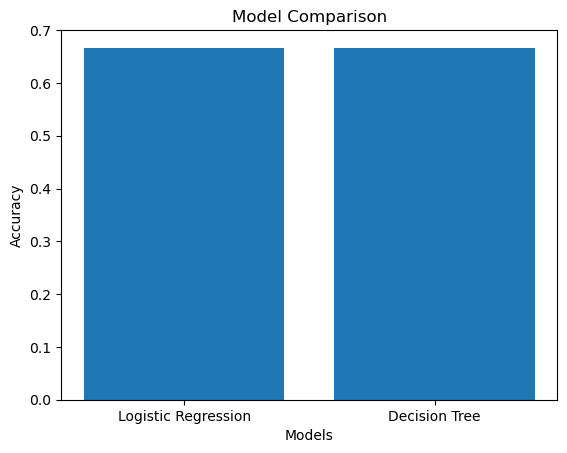


Sample Transaction Prediction:
⚠️ Fraudulent Transaction


In [2]:
# ===============================
# Credit Card Fraud Detection
# Single Cell Complete Project
# ===============================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------------
# Load dataset
# -------------------------------
data = pd.read_csv("creditcard.csv")

print("Dataset Preview:")
print(data.head())

# -------------------------------
# Dataset info & missing values
# -------------------------------
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

# -------------------------------
# Encode categorical columns
# -------------------------------
le = LabelEncoder()
data['Transaction_Type'] = le.fit_transform(data['Transaction_Type'])
data['Location_Risk'] = le.fit_transform(data['Location_Risk'])

# -------------------------------
# Features & target
# -------------------------------
X = data.drop('Is_Fraud', axis=1)
y = data['Is_Fraud']

# -------------------------------
# Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -------------------------------
# Logistic Regression Model
# -------------------------------
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, zero_division=0))

# -------------------------------
# Decision Tree Model
# -------------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, zero_division=0))

# -------------------------------
# Model Comparison Plot
# -------------------------------
models = ['Logistic Regression', 'Decision Tree']
accuracy = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt)
]

plt.figure()
plt.bar(models, accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

# -------------------------------
# Sample Prediction
# -------------------------------
sample = pd.DataFrame({
    'Time': [250],
    'Amount': [600],
    'Transaction_Type': [1],  # Online
    'Location_Risk': [0]      # High
})

prediction = lr.predict(sample)

print("\nSample Transaction Prediction:")
if prediction[0] == 1:
    print("⚠️ Fraudulent Transaction")
else:
    print("✅ Legitimate Transaction")